## 1.复现波士顿房价预测代码

### 导入包

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image
from keras.utils import to_categorical

Using TensorFlow backend.


### 导入数据

In [3]:
(train_data, train_label), (test_data, test_label) = tf.keras.datasets.boston_housing.load_data()

In [4]:
train_data.shape

(404, 13)

In [5]:
train_label.shape

(404,)

### 构建神经网络模型
### 样本有13个特征，用13个输入节点，类别标号用1个神经元
### 对应输入层13个节点，输出层1个神经元

In [6]:
with tf.Graph().as_default() as g:
    inputs = tf.placeholder(shape=[None, 13], dtype=tf.float32)
    labels = tf.placeholder(shape=[None], dtype=tf.float32)
    
    h1 = tf.keras.layers.Dense(64, activation=tf.nn.relu)(inputs)
    h2 = tf.keras.layers.Dense(16, activation=tf.nn.relu)(h1)
    output = tf.keras.layers.Dense(1, activation=None)(h2)
    
    loss = tf.reduce_mean(
        tf.keras.losses.mean_squared_error(labels, output))
    
    optim = tf.train.GradientDescentOptimizer(learning_rate=1e-6)
    train_op = optim.minimize(loss)

with tf.Session(graph=g) as sess:
    sess.run(tf.global_variables_initializer())
    batch_size= 32
    for epoch in range(200):
        order = np.argsort(np.random.random(train_label.shape))
        train_data = train_data[order]
        train_label = train_label[order]
        
        res_train_losses = []
        for i in range(train_label.shape[0] // batch_size):
            start = i * batch_size
            end = (i + 1) * batch_size
            res_train_loss, _ = sess.run([loss, train_op],
                     feed_dict={inputs: train_data[start: end],
                                labels: train_label[start: end]})
            res_train_losses.append(res_train_loss)
        res_val_loss = sess.run(loss,
                 feed_dict={inputs: test_data,
                            labels: test_label})
        print('epoch %3d, train loss %2.4f, val loss %2.4f' %
              (epoch, res_train_loss, np.mean(res_train_losses)))

epoch   0, train loss 186.4791, val loss 462.6805
epoch   1, train loss 185.6122, val loss 173.4911
epoch   2, train loss 107.5209, val loss 133.9700
epoch   3, train loss 112.8902, val loss 110.4484
epoch   4, train loss 108.6389, val loss 99.5674
epoch   5, train loss 111.9629, val loss 95.3996
epoch   6, train loss 78.0696, val loss 93.3494
epoch   7, train loss 149.4837, val loss 95.0955
epoch   8, train loss 85.5454, val loss 93.0854
epoch   9, train loss 88.5140, val loss 95.4506
epoch  10, train loss 74.8061, val loss 91.3358
epoch  11, train loss 70.3077, val loss 91.9780
epoch  12, train loss 19.3951, val loss 91.6357
epoch  13, train loss 81.7275, val loss 90.9258
epoch  14, train loss 101.5048, val loss 93.0668
epoch  15, train loss 104.1625, val loss 91.7508
epoch  16, train loss 136.1601, val loss 91.5094
epoch  17, train loss 99.2767, val loss 89.1939
epoch  18, train loss 58.3621, val loss 89.3839
epoch  19, train loss 100.1761, val loss 94.5343
epoch  20, train loss 97.

epoch 173, train loss 63.1365, val loss 86.2493
epoch 174, train loss 108.2589, val loss 90.4931
epoch 175, train loss 101.0409, val loss 86.9532
epoch 176, train loss 50.7456, val loss 86.8341
epoch 177, train loss 133.0567, val loss 89.0229
epoch 178, train loss 60.3068, val loss 86.5886
epoch 179, train loss 89.3309, val loss 90.3397
epoch 180, train loss 66.7589, val loss 88.1717
epoch 181, train loss 144.8993, val loss 89.7373
epoch 182, train loss 98.9004, val loss 90.0569
epoch 183, train loss 138.7227, val loss 85.5335
epoch 184, train loss 134.9633, val loss 87.4311
epoch 185, train loss 73.6953, val loss 90.2550
epoch 186, train loss 35.1896, val loss 87.2517
epoch 187, train loss 80.8249, val loss 86.4983
epoch 188, train loss 87.3772, val loss 88.7725
epoch 189, train loss 91.6497, val loss 86.0316
epoch 190, train loss 101.7258, val loss 87.8313
epoch 191, train loss 105.3041, val loss 88.3333
epoch 192, train loss 118.0810, val loss 89.4107
epoch 193, train loss 95.8465, 

## 2.为上述模型训练添加代价变化的TensorBoard摘要

## 3.导入Fashion_MNIST数据集并可视化

In [7]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()

#### 划分训练集和测试集（60000:10000）

In [8]:
(train_data, train_label), (test_data, test_label) = fashion_mnist
train_label = tf.one_hot(train_label, depth=10)
test_label = tf.one_hot(test_label,depth=10)
#number = {'0':0,'1':1,'2':2,'3':3,'4':4,'5':5,'6':6,'7':7,'8':8,'9':9}
#for i in range(len(train_label)):
#    train_label = to_categorical(number[train_label[i]],10)
#print(train_label.shape)

In [9]:
sess1 = tf.Session()
#sess.run(tf.global_variables_initializer())
train_label = train_label.eval(session=sess1)
test_label = test_label.eval(session=sess1)
sess1.close

<bound method BaseSession.close of <tensorflow.python.client.session.Session object at 0x7f4061607a58>>

In [10]:
train_data.shape

(60000, 28, 28)

In [11]:
train_label.shape

(60000, 10)

In [12]:
test_data.shape

(10000, 28, 28)

In [13]:
test_label.shape

(10000, 10)

In [14]:
train_data.shape[0]

60000

#### 可视化第一张图片(28*28个特征)

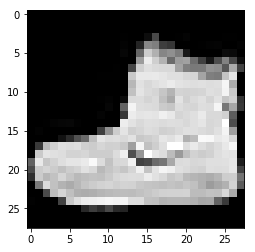

In [15]:
plt.imshow(Image.fromarray(train_data[0].reshape([28,28])))

## 4,5.构建全连接神经网络并使用导入的数据训练分类器并改进神经网络的结构与训练方法提高模型性能

In [16]:
train_data.resize(60000,28*28)
test_data.resize(10000,28*28)
print(train_data.shape)
print(test_data.shape)

(60000, 784)
(10000, 784)


In [11]:
#group = train_data.shape[0]//32
#print(group)
#group_test = test_data.shape[0]//32
#print(group_test)

1875
312


In [17]:
with tf.Graph().as_default() as g:
    inputs = tf.placeholder(shape=[None,784],dtype=tf.float32)
    labels = tf.placeholder(shape=[None,10],dtype=tf.float32)
    
    #output = tf.keras.layers.Dense(1,activation=None)(inputs)
    #h1 = tf.keras.layers.Dense(64, activation=tf.nn.relu)(inputs)
    h1 = tf.keras.layers.Dense(64, activation=tf.nn.relu)(inputs)
    h2 = tf.keras.layers.Dense(32,activation=tf.nn.relu)(h1)
    h3 = tf.keras.layers.Dense(16,activation=tf.nn.relu)(h2)
    output = tf.keras.layers.Dense(10, activation=None)(h3)
    
    #代价函数
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=output, labels=labels))
    # 正确率
    acc = tf.reduce_mean(
        tf.cast(tf.equal(tf.argmax(labels,axis=1), tf.argmax(output,axis=1)),
                tf.float32))
    
    # 定义梯度下降法优化器
    optim = tf.train.GradientDescentOptimizer(learning_rate=0.001)
    train_op = optim.minimize(loss)

with tf.Session(graph=g) as sess:
    sess.run(tf.global_variables_initializer())
    batch_size = 32
    
    #训练模型
    group_train = train_data.shape[0]//32
    group_test = test_data.shape[0]//32
    for step in range(200):
        acc_s = []
        for train_step in range(group_train):
            batch_images = train_data[train_step*32:train_step*32+32,:]#shape(32,784)
            batch_labels = train_label[train_step*32:train_step*32+32,:]#shape(32)
            res_loss,_ = sess.run([loss,train_op],feed_dict={inputs:batch_images,labels:batch_labels})
            
            #输出代价并验证模型
            if train_step % 100 == 0:
                accs = []
                for test_step in range(group_test):
                    batch_test_images = test_data[test_step*32:test_step*32+32,:]
                    batch_test_labels = test_label[test_step*32:test_step*32+32,:]
                    res_acc = sess.run(acc, feed_dict={inputs: batch_test_images,labels: batch_test_labels})
                    accs.append(res_acc)
                accs = np.mean(accs)
                acc_s.append(accs)
        acc_s = np.mean(acc_s)
        print('step %5d, loss %2.4f, acc %.4f' % (step, res_loss, acc_s))

step     0, loss 2.2208, acc 0.1246
step     1, loss 2.0347, acc 0.2074
step     2, loss 1.7912, acc 0.2736
step     3, loss 1.6899, acc 0.3474
step     4, loss 1.6594, acc 0.3608
step     5, loss 1.6360, acc 0.3665
step     6, loss 1.6188, acc 0.3701
step     7, loss 1.6065, acc 0.3724
step     8, loss 1.5940, acc 0.3745
step     9, loss 1.5110, acc 0.4031
step    10, loss 1.4967, acc 0.4615
step    11, loss 1.4741, acc 0.4657
step    12, loss 1.4594, acc 0.4660
step    13, loss 1.4461, acc 0.4669
step    14, loss 1.4269, acc 0.4688
step    15, loss 1.4232, acc 0.4701
step    16, loss 1.4153, acc 0.4713
step    17, loss 1.4072, acc 0.4712
step    18, loss 1.3996, acc 0.4719
step    19, loss 1.3951, acc 0.4725
step    20, loss 1.3817, acc 0.4727
step    21, loss 1.3748, acc 0.4732
step    22, loss 1.3770, acc 0.4737
step    23, loss 1.3709, acc 0.4740
step    24, loss 1.3589, acc 0.4741
step    25, loss 1.3547, acc 0.4742
step    26, loss 1.3509, acc 0.4748
step    27, loss 1.3470, acc